In [24]:

# Step 1: Load Data
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# Load the dataset containing all MTG cards
file_path = "allcards.csv"
df = pd.read_csv(file_path, low_memory=False) #very important to remember that low_memory False was required here.
df.head()


,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550.0,normal,NaN,{5}{W}{W},7.0,['W'],['W'],Creature — Human Cleric,NaN,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","['10E', 'JUD', 'UMA']",First strike\nWhen Ancestor's Chosen comes int...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,NaN,normal,NaN,{5}{W}{W},7.0,['W'],['W'],Creature — Human Cleric,NaN,...,NaN,"['10E', 'JUD', 'UMA']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465.0,normal,NaN,{4}{W},5.0,['W'],['W'],Creature — Angel,NaN,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...","Flying\nWhen Angel of Mercy comes into play, y...",Creature - Angel,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,NaN,normal,NaN,{4}{W},5.0,['W'],['W'],Creature — Angel,NaN,...,NaN,"['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",NaN,NaN,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",NaN,NaN,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711.0,normal,NaN,{2}{W},3.0,['W'],['W'],Sorcery,NaN,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","['10E', '9ED', 'EXO', 'P02', 'POR', 'PS11', 'S...",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382


In [12]:

# Step 2: Parse Mana Cost 
#function converts the mana cost from symbols to a numeric value

def parse_mana_cost(mc):
    if not isinstance(mc, str):
        return float('nan')
    symbols = re.findall(r"\{([^}]*)\}", mc)
    total = 0
    for symbol in symbols:
        try:
            total += int(symbol)
        except ValueError:
            if symbol.upper() in ['W','U','B','R','G']:
                total += 1
    return total

# Apply the function to the 'mana_cost' column
df['x_mana_cost'] = df['mana_cost'].apply(parse_mana_cost)

# Display the updated dataframe
df[['mana_cost', 'x_mana_cost']].head()


,mana_cost,x_mana_cost
0,{5}{W}{W},7
1,{5}{W}{W},7
2,{4}{W},5
3,{4}{W},5
7,{1}{W},2


In [14]:

# Step 3: Convert Power to Numeric and Filter Data

df['power'] = pd.to_numeric(df['power'], errors='coerce')

# Filter out NaN values and keep data within realistic ranges
df = df.dropna(subset=['x_mana_cost', 'power'])
df = df[(df['x_mana_cost'] >= 0) & (df['x_mana_cost'] <= 12)]
df = df[(df['power'] >= 0) & (df['power'] <= 12)]

# Check the number of valid cards remaining
print(f"Total cards (before set filtering): {len(df)}")


Total cards (before set filtering): 43029


In [16]:

# Step 4: Filter by Sets (2011 vs. 2024)

# Define the sets for 2011 and 2024
sets_2011 = ["MBS", "NPH", "M12", "ISD"]
sets_2024 = ["RRM", "MKM", "RCE", "FAL", "OTJ", "MH3", "ACD", "BLB", "DMH", "FDN"]

# Filter the dataframe for cards from these sets
df_2011 = df[df['set'].isin(sets_2011)]
df_2024 = df[df['set'].isin(sets_2024)]

# Display the number of cards from each year
print(f"2011 cards plotted: {len(df_2011)}")
print(f"2024 cards plotted: {len(df_2024)}")


2011 cards plotted: 399
2024 cards plotted: 494


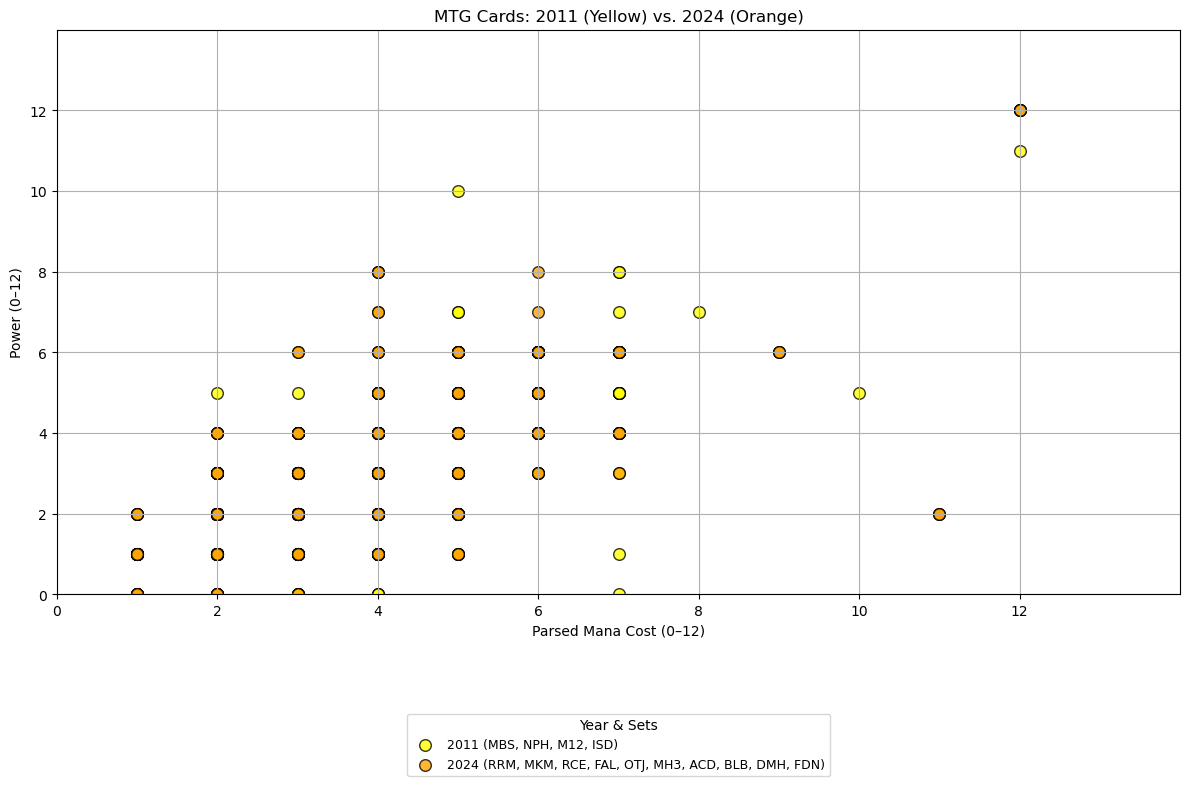

In [18]:

# Step 5: Visualization with Scatter Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot 2011 cards in yellow
if not df_2011.empty:
    plt.scatter(
        df_2011['x_mana_cost'],
        df_2011['power'],
        c='yellow',
        edgecolors='black',
        alpha=0.8,
        s=70,
        label="2011 (MBS, NPH, M12, ISD)"
    )

# Plot 2024 cards in orange
if not df_2024.empty:
    plt.scatter(
        df_2024['x_mana_cost'],
        df_2024['power'],
        c='orange',
        edgecolors='black',
        alpha=0.8,
        s=70,
        label="2024 (RRM, MKM, RCE, FAL, OTJ, MH3, ACD, BLB, DMH, FDN)"
    )

# Set axes limits and ticks
plt.xlim(0, 14)
plt.ylim(0, 14)
ticks = range(0, 13, 2)
plt.xticks(ticks)
plt.yticks(ticks)

# Add labels, title, and grid
plt.xlabel("Parsed Mana Cost (0–12)")
plt.ylabel("Power (0–12)")
plt.title("MTG Cards: 2011 (Yellow) vs. 2024 (Orange)")
plt.grid(True)

# Add legend below the plot
plt.legend(
    title="Year & Sets",
    bbox_to_anchor=(0.5, -0.2),
    loc="upper center",
    ncol=1,
    fontsize=9
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

plt.show()
